In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
import calendar
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('C:\\Users\\Yash\\Desktop\\Data Science\\Projects in class 9\\3. Airlines Passengers Forecasting\\International Airline Passengers.csv')

In [3]:
data.head()

,Month,No_passengers_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
data = data.set_index(['Month'])
print(data.head())

            No_passengers_thousands
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121


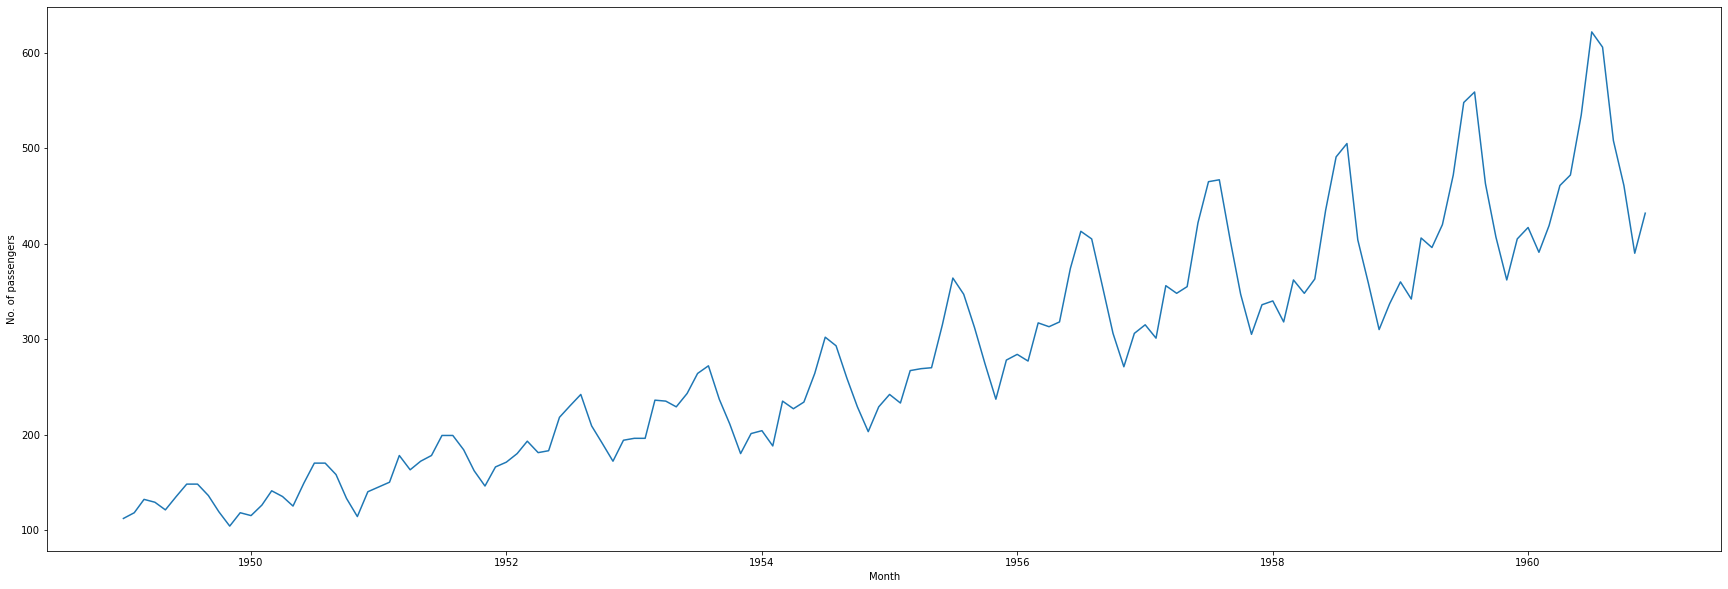

In [6]:
plt.figure(figsize=(30,10))
plt.xlabel("Month")
plt.ylabel("No. of passengers")
plt.plot(data)

In [7]:
mean = data.rolling(window=12).mean()

In [8]:
std = data.rolling(window=12).std()

In [9]:
print(mean.head())

            No_passengers_thousands
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN


In [10]:
print(std.head())

            No_passengers_thousands
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN


In [11]:
data.shape

(144, 1)

In [12]:
data.astype('float32')

,No_passengers_thousands
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [13]:
data.astype('int32')

,No_passengers_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
dat = scaler.fit_transform(data)

In [15]:
dat

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [16]:
training_size = int(len(dat)*0.70)

In [17]:
training_size

100

In [18]:
test_size = len(dat)-training_size

In [19]:
test_size

44

In [20]:
train_data, test_data = dat[0:training_size,:], dat[training_size:len(dat),:1]

In [21]:
train_data.shape

(100, 1)

In [22]:
test_data.shape

(44, 1)

In [23]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [24]:
test_data

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [25]:
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
timestep = 4
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [27]:
X_train.shape, y_train.shape

((95, 4), (95,))

In [28]:
X_train = X_train.reshape(X_train.shape[0],4,1)
X_test = X_test.reshape(X_test.shape[0],4,1)

In [29]:
X_train.shape

(95, 4, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
#sequential model 
regressor=Sequential()

regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))


regressor.add(LSTM(units=100,return_sequences=True))


regressor.add(LSTM(units=100,return_sequences=True))


regressor.add(LSTM(units=100))


regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=90,batch_size=1,verbose=1)

Train on 95 samples, validate on 39 samples
Epoch 1/90
95/95 [==============================] - 5s 57ms/sample - loss: 0.0185 - val_loss: 0.1056
Epoch 2/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0114 - val_loss: 0.0504
Epoch 3/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0075 - val_loss: 0.0282
Epoch 4/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0092 - val_loss: 0.0448
Epoch 5/90
95/95 [==============================] - 1s 6ms/sample - loss: 0.0087 - val_loss: 0.0391
Epoch 6/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0080 - val_loss: 0.0526
Epoch 7/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0081 - val_loss: 0.0483
Epoch 8/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0074 - val_loss: 0.0372
Epoch 9/90
95/95 [==============================] - 0s 5ms/sample - loss: 0.0068 - val_loss: 0.0496
Epoch 10/90
95/95 [==============================] - 0s

In [32]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [33]:
test_predict

array([[0.5814964 ],
       [0.36210668],
       [0.39341256],
       [0.35850883],
       [0.50111413],
       [0.4308395 ],
       [0.41352496],
       [0.5695684 ],
       [0.41069204],
       [0.5531621 ],
       [0.6772993 ],
       [0.6646723 ],
       [0.6107869 ],
       [0.2434242 ],
       [0.49013734],
       [0.34546477],
       [0.5043144 ],
       [0.48212227],
       [0.4397524 ],
       [0.68146056],
       [0.43465316],
       [0.6621017 ],
       [0.6387022 ],
       [0.7286604 ],
       [0.48687372],
       [0.2658754 ],
       [0.55091274],
       [0.40838668],
       [0.61445594],
       [0.47444087],
       [0.4718275 ],
       [0.624118  ],
       [0.58557487],
       [0.5450242 ],
       [0.76925045],
       [0.66311723],
       [0.32731086],
       [0.34508806],
       [0.6969833 ]], dtype=float32)

In [34]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [35]:
test_predict

array([[405.21515],
       [291.57126],
       [307.7877 ],
       [289.70758],
       [363.57712],
       [327.17487],
       [318.20593],
       [399.03644],
       [316.7385 ],
       [390.538  ],
       [454.84106],
       [448.30026],
       [420.38763],
       [230.09373],
       [357.89114],
       [282.95078],
       [365.2349 ],
       [353.73935],
       [331.79175],
       [456.99658],
       [329.15036],
       [446.9687 ],
       [434.84775],
       [481.4461 ],
       [356.2006 ],
       [241.72345],
       [389.3728 ],
       [315.5443 ],
       [422.28818],
       [349.76038],
       [348.40665],
       [427.29312],
       [407.3278 ],
       [386.32257],
       [502.47174],
       [447.49475],
       [273.54703],
       [282.7556 ],
       [465.03735]], dtype=float32)

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
math.sqrt(mean_squared_error(y_train, train_predict))

233.81238371946228

In [38]:
math.sqrt(mean_squared_error(y_test, test_predict))

375.34836638124835

In [39]:
# for train
look_back = 4
train_Plot = np.empty_like(dat)
train_Plot[:, :] = np.nan
train_Plot[look_back:len(train_predict)+look_back, :] = train_predict

In [40]:
# for test
test_Plot = np.empty_like(dat)
test_Plot[:, :] = np.nan
test_Plot[len(train_predict)+(look_back*2)+1:len(dat)-1, :] = test_predict

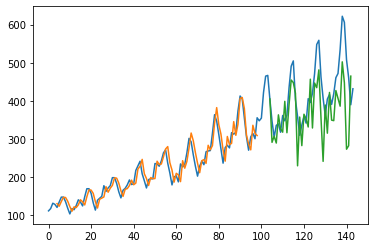

In [41]:
#plot
plt.plot(scaler.inverse_transform(dat))
plt.plot(train_Plot)
plt.plot(test_Plot)
plt.show()

In [42]:
train_Plot = np.empty_like(dat)

In [43]:
train_Plot

array([[             nan],
       [ 0.00000000e+000],
       [ 1.05081165e-311],
       [ 1.05056993e-311],
       [ 0.00000000e+000],
       [ 0.00000000e+000],
       [             nan],
       [ 0.00000000e+000],
       [-8.93103470e+303],
       [ 0.00000000e+000],
       [ 4.44659081e-323],
       [ 1.05100549e-311],
       [ 1.05054881e-311],
       [             nan],
       [ 0.00000000e+000],
       [             nan],
       [ 1.05100516e-311],
       [ 1.05038792e-311],
       [ 3.55727265e-322],
       [ 3.45845952e-323],
       [ 1.05100549e-311],
       [ 1.05054881e-311],
       [ 0.00000000e+000],
       [ 4.94065646e-324],
       [ 4.94065646e-324],
       [ 1.05100516e-311],
       [ 1.05038792e-311],
       [ 7.11454530e-322],
       [ 1.48219694e-323],
       [ 1.05100549e-311],
       [ 1.05054881e-311],
       [ 0.00000000e+000],
       [ 4.94065646e-324],
       [ 4.94065646e-324],
       [ 0.00000000e+000],
       [ 4.94065646e-324],
       [ 1.06718180e-321],
 

In [44]:
train_Plot[look_back:len(train_predict)+look_back, :] = train_predict 

In [45]:
train_predict

array([[130.93137 ],
       [124.16859 ],
       [136.39314 ],
       [147.65332 ],
       [146.99644 ],
       [137.35092 ],
       [123.24942 ],
       [111.05742 ],
       [122.49724 ],
       [120.70112 ],
       [127.79198 ],
       [141.06955 ],
       [135.81595 ],
       [127.55672 ],
       [148.97609 ],
       [167.01953 ],
       [166.45848 ],
       [157.7051  ],
       [136.09897 ],
       [119.419426],
       [142.29645 ],
       [145.43452 ],
       [148.38275 ],
       [175.37851 ],
       [160.92719 ],
       [171.3959  ],
       [178.79819 ],
       [198.4665  ],
       [197.794   ],
       [184.69055 ],
       [164.74522 ],
       [150.0268  ],
       [168.57277 ],
       [170.35057 ],
       [178.23126 ],
       [192.4606  ],
       [180.38571 ],
       [184.73456 ],
       [221.69252 ],
       [228.80334 ],
       [246.89061 ],
       [209.24782 ],
       [196.88759 ],
       [178.48311 ],
       [199.34195 ],
       [196.35936 ],
       [196.67326 ],
       [242.0